In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('../dataset/CustomersTransactions2021.csv')
df.shape

(34, 9)

### BOXPLOT

Text(0, 0.5, 'ranges')

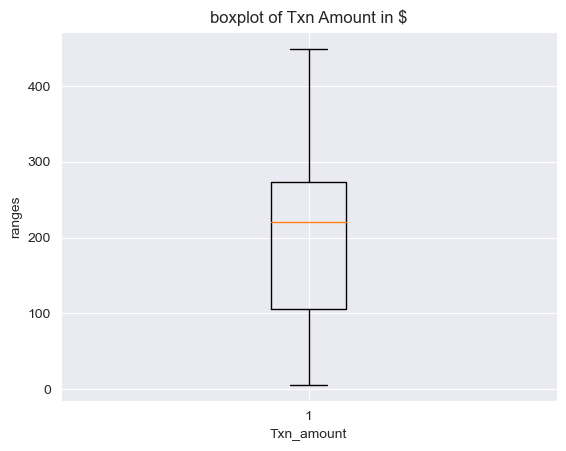

In [3]:
#plot a box plot example
plt.boxplot(df['txn_total'])
plt.title("boxplot of Txn Amount in $")
plt.xlabel("Txn_amount")
plt.ylabel("ranges")

### SubPlot

In [4]:
df.head()

,customer_id,id,txn_type,txn_total,Customers,Products,Province,Relationship,Category
0,1001,1,Debit,165.78,Johnny Awesome,3,ON,1,wealth
1,1001,2,Credit,42.10,Johnny Awesome,3,ON,1,wealth
2,1001,4,Credit,103.03,Johnny Awesome,3,ON,1,wealth
3,1001,5,Credit,56.60,Johnny Awesome,3,ON,1,wealth
4,1002,6,Debit,214.34,Bob Marley,4,ON,1,personal_banking


In [5]:
df['Customers'].unique()

array(['Johnny Awesome', 'Bob Marley', 'Taylor Swift', 'Stephen Smith',
       'Delilah Avery', 'Johnson Cory', 'Maria Alva', 'Jessica Fast',
       'Mariah Anita Smith', 'Robert Optimus', 'Steven Prime',
       'Stephanie Element'], dtype=object)

In [6]:
df[df['Customers'] == 'Delilah Avery']

,customer_id,id,txn_type,txn_total,Customers,Products,Province,Relationship,Category
10,1014,12,Cash,67.96,Delilah Avery,2,AB,3,personal_banking
11,1014,20,Debit,449.39,Delilah Avery,2,AB,3,personal_banking
12,1014,28,Cash,183.08,Delilah Avery,2,AB,3,personal_banking


In [7]:
df.rename(columns={'id': 'txn_id'}, inplace=True)

df.columns

Index(['customer_id', 'txn_id', 'txn_type', 'txn_total', 'Customers',
       'Products', 'Province', 'Relationship', 'Category'],
      dtype='object')

Text(0.5, 1.0, 'Johnson Cory Transactions')

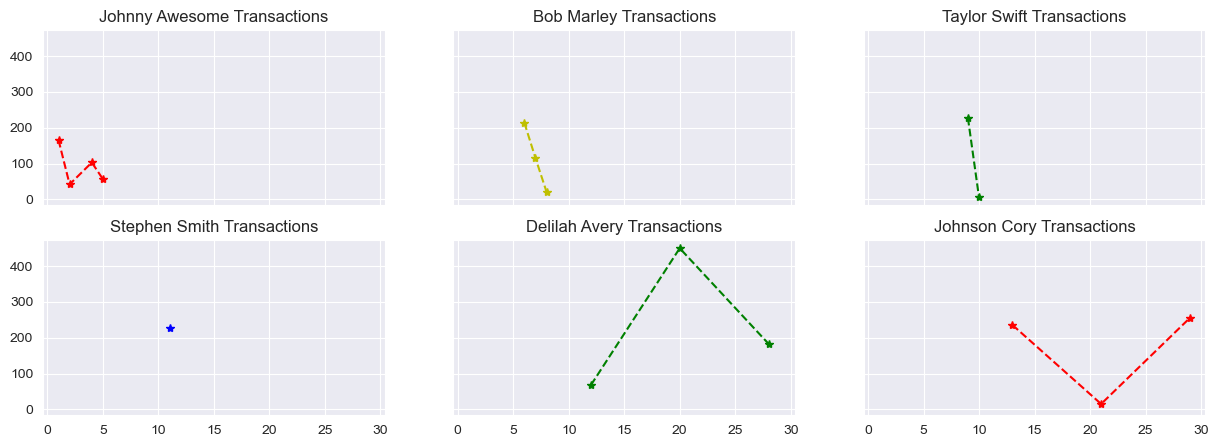

In [8]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 5), sharex=True, sharey=True)
ax1.plot(df[df['Customers'] == 'Johnny Awesome']['txn_id'], df[df['Customers'] == 'Johnny Awesome']['txn_total'],
         'r--*')
ax1.set_title('Johnny Awesome Transactions')

ax2.plot(df[df['Customers'] == 'Bob Marley']['txn_id'], df[df['Customers'] == 'Bob Marley']['txn_total'], 'y--*')
ax2.set_title('Bob Marley Transactions')

ax3.plot(df[df['Customers'] == 'Taylor Swift']['txn_id'], df[df['Customers'] == 'Taylor Swift']['txn_total'], 'g--*')
ax3.set_title('Taylor Swift Transactions')

ax4.plot(df[df['Customers'] == 'Stephen Smith']['txn_id'], df[df['Customers'] == 'Stephen Smith']['txn_total'], 'b--*')
ax4.set_title('Stephen Smith Transactions')

ax5.plot(df[df['Customers'] == 'Delilah Avery']['txn_id'], df[df['Customers'] == 'Delilah Avery']['txn_total'], 'g--*')
ax5.set_title('Delilah Avery Transactions')

ax6.plot(df[df['Customers'] == 'Johnson Cory']['txn_id'], df[df['Customers'] == 'Johnson Cory']['txn_total'], 'r--*')
ax6.set_title('Johnson Cory Transactions')

Notes
* created a subplot of 2 rows and 3 columns of plots
* sharex and sharey displays the graduations on the spie of the subplots, in other words the units of the x and y axis are only shown to the extreme left side and the base on the subplot
* to plot on a specific subplot, use the associated label, ax1, ax2, etc
* the syntax for a straight line plot is plt.plot(x,y)

Text(0.5, 1.0, 'All Customer Transactions')

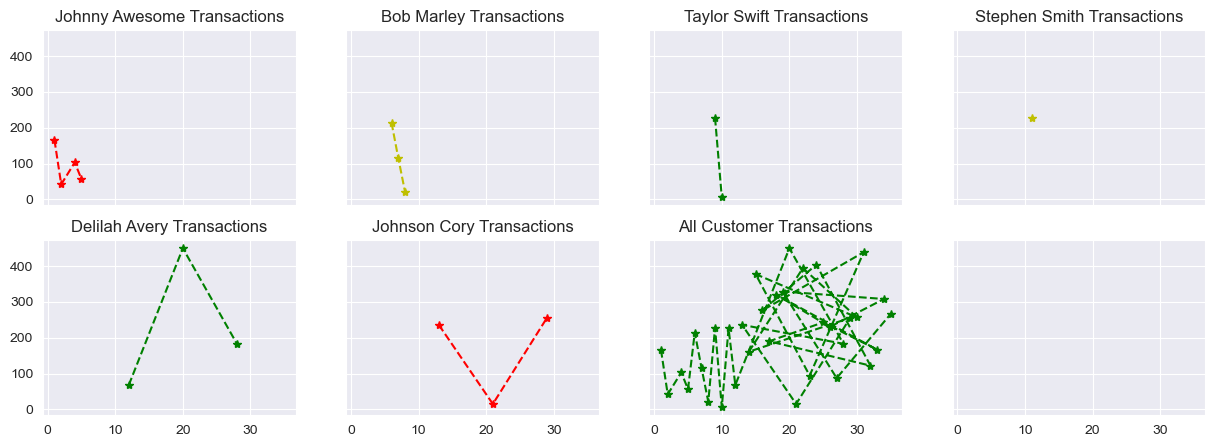

In [9]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(15, 5), sharex=True, sharey=True)
ax1.plot(df[df['Customers'] == 'Johnny Awesome']['txn_id'], df[df['Customers'] == 'Johnny Awesome']['txn_total'],
         'r--*')
ax1.set_title('Johnny Awesome Transactions')

ax2.plot(df[df['Customers'] == 'Bob Marley']['txn_id'], df[df['Customers'] == 'Bob Marley']['txn_total'], 'y--*')
ax2.set_title('Bob Marley Transactions')

ax3.plot(df[df['Customers'] == 'Taylor Swift']['txn_id'], df[df['Customers'] == 'Taylor Swift']['txn_total'], 'g--*')
ax3.set_title('Taylor Swift Transactions')

ax4.plot(df[df['Customers'] == 'Stephen Smith']['txn_id'], df[df['Customers'] == 'Stephen Smith']['txn_total'], 'y--*')
ax4.set_title('Stephen Smith Transactions')

ax5.plot(df[df['Customers'] == 'Delilah Avery']['txn_id'], df[df['Customers'] == 'Delilah Avery']['txn_total'], 'g--*')
ax5.set_title('Delilah Avery Transactions')

ax6.plot(df[df['Customers'] == 'Johnson Cory']['txn_id'], df[df['Customers'] == 'Johnson Cory']['txn_total'], 'r--*')
ax6.set_title('Johnson Cory Transactions')

ax7.plot(df['txn_id'], df['txn_total'], 'g--*')  #label="TRANSACTION_DOLLARS")
ax7.set_title('All Customer Transactions')


(<Figure size 640x480 with 1 Axes>, <Axes: >)

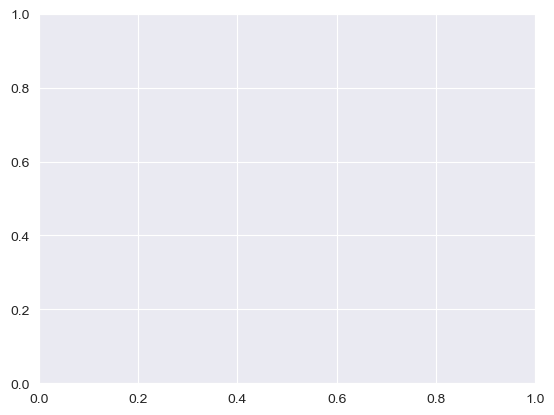

In [10]:
plt.subplots()

### BarGraph

In [11]:
# for each banking category, find the total_amount spent in it:

df.groupby('Category')['txn_total'].sum()

Category
hnw                 1564.84
personal_banking    3445.79
wealth              2037.46
Name: txn_total, dtype: float64

In [12]:
# for each banking category, find the total_amount spent in it:

x1 = df.groupby('Category').aggregate({'txn_total': 'sum'})

x1

,txn_total
Category,
hnw,1564.84
personal_banking,3445.79
wealth,2037.46


<Axes: xlabel='Category'>

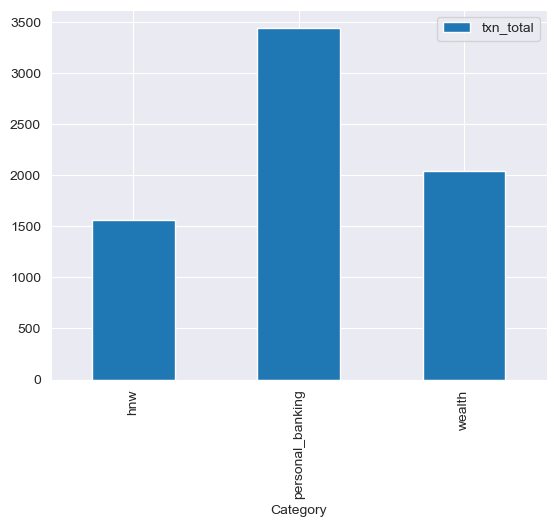

In [13]:
# create a bar-graph for this categorization

x1.plot(kind='bar')

<Axes: xlabel='Category'>

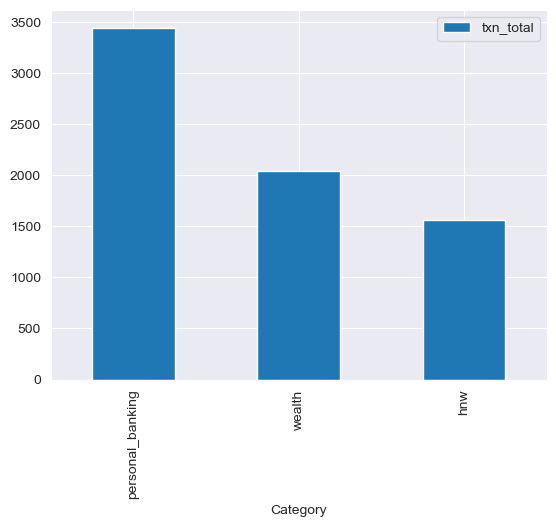

In [14]:
# create a bar-graph for this categorization and sort values in descending order

x1 = x1.sort_values(by='txn_total', ascending=False)

x1.plot(kind='bar')

<BarContainer object of 3 artists>


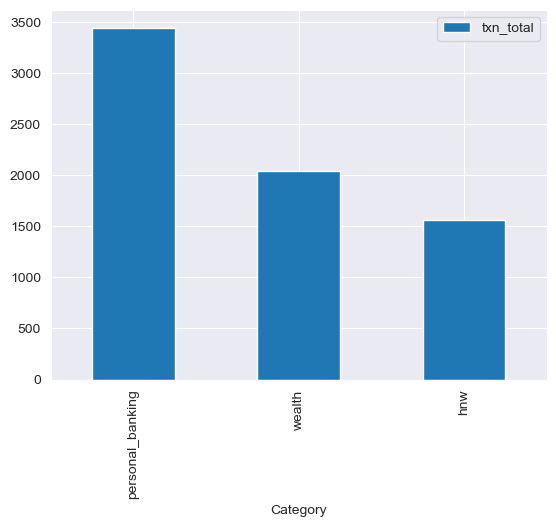

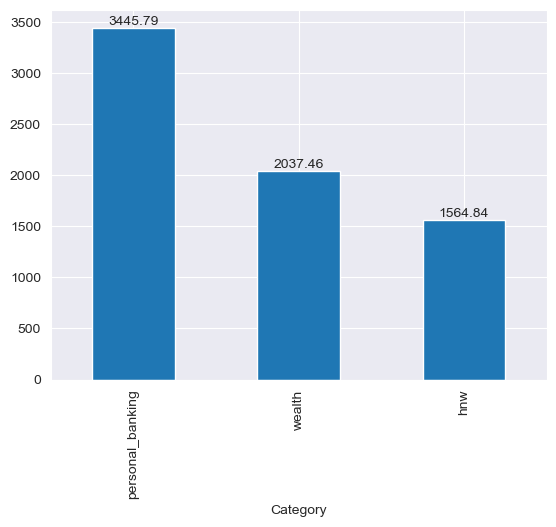

In [15]:
# annotate each bar

# x1.category
# print(x1['txn_total'])

y1 = x1.plot(kind='bar')

print(y1.containers[0])

x1.plot(kind='bar', legend=False).bar_label(y1.containers[0])

plt.show()
# 
# for x, y in zip(x1['txn_total'], x1['Category']):
#     print(x, y)
# label = '{:.2f}'.format(x)
# plt.annotate(label, xy=(x, y))


In [16]:
# x1.plot(kind='bar')
# 
# for idx in x1.itertuples():
#     label = f'{idx[1]}'
#     print(idx[0], idx[1], label)
#     plt.annotate(idx[1], (idx[0], idx[1]))

In [17]:
sorted_df = df.groupby('Category').agg({'txn_total': 'sum'}).sort_values('txn_total', ascending=True)

amounts = sorted_df['txn_total']

amounts

Category
hnw                 1564.84
wealth              2037.46
personal_banking    3445.79
Name: txn_total, dtype: float64

<BarContainer object of 3 artists>

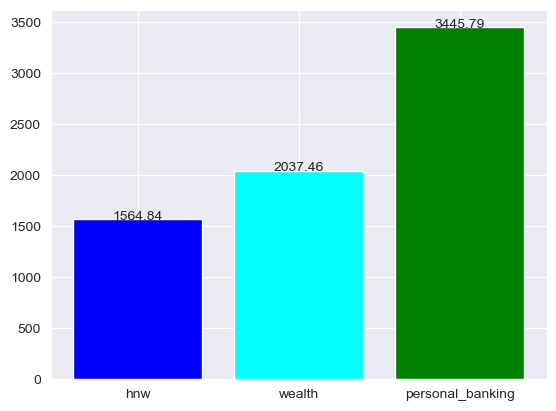

In [18]:
for idx, amount in enumerate(amounts):
    plt.text(idx, amount, amount, ha='center')

plt.bar(sorted_df.index, amounts, color=['blue', 'cyan', 'green'])

<Axes: xlabel='Category,txn_type'>

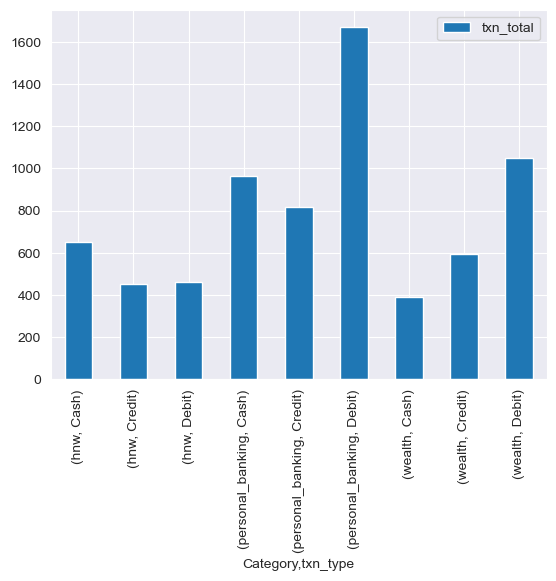

In [19]:
# for each banking category, find the total amount paid via each payment method

k1 = df.groupby(['Category', 'txn_type']).agg({'txn_total': 'sum'})

k1.plot(kind='bar')

<Axes: xlabel='Category'>

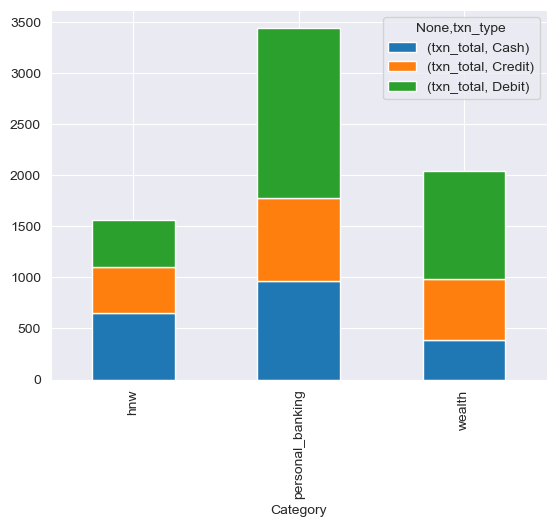

In [20]:
k1.unstack('txn_type').plot(kind='bar', stacked=True)